In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots we will create

In [4]:
# Read in the data

df = pd.read_csv(r'C:\Users\KyThuat88\Desktop\data.csv')

In [5]:
# Let's look at the data
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [6]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

type_school - 0.0%
school_accreditation - 0.0%
gender - 0.0%
interest - 0.0%
residence - 0.0%
parent_age - 0.0%
parent_salary - 0.0%
house_area - 0.0%
average_grades - 0.0%
parent_was_in_college - 0.0%
in_college - 0.0%


In [7]:
# Data types for our columns

df.dtypes

type_school               object
school_accreditation      object
gender                    object
interest                  object
residence                 object
parent_age                 int64
parent_salary              int64
house_area               float64
average_grades           float64
parent_was_in_college       bool
in_college                  bool
dtype: object

In [8]:
# Change data type of columns

df = df.dropna()

In [13]:
df["parent_was_in_college"] = df["parent_was_in_college"].astype(int)

In [14]:
df["in_college"] = df["in_college"].astype(int)

In [15]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,0,1
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,0,1
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,0,1
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,1,1
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,0,0


In [17]:
df = df.sort_values(by=['parent_age'], inplace=False, ascending=False)

In [18]:
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
778,Academic,A,Male,Less Interested,Urban,65,4360000,65.7,86.55,0,0
220,Academic,B,Female,Uncertain,Urban,64,3860000,86.1,85.28,0,1
866,Academic,A,Female,Less Interested,Urban,62,5220000,53.0,84.32,0,0
618,Academic,B,Female,Quiet Interested,Urban,62,6110000,87.2,88.74,1,1
914,Vocational,A,Male,Quiet Interested,Urban,61,5170000,43.8,81.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...
816,Vocational,A,Male,Very Interested,Rural,42,7530000,67.7,84.76,0,0
557,Academic,A,Male,Not Interested,Rural,41,3020000,50.6,77.18,1,0
94,Vocational,B,Male,Very Interested,Rural,41,9110000,79.2,91.70,1,1
336,Academic,B,Female,Less Interested,Rural,40,3810000,44.7,81.00,1,0


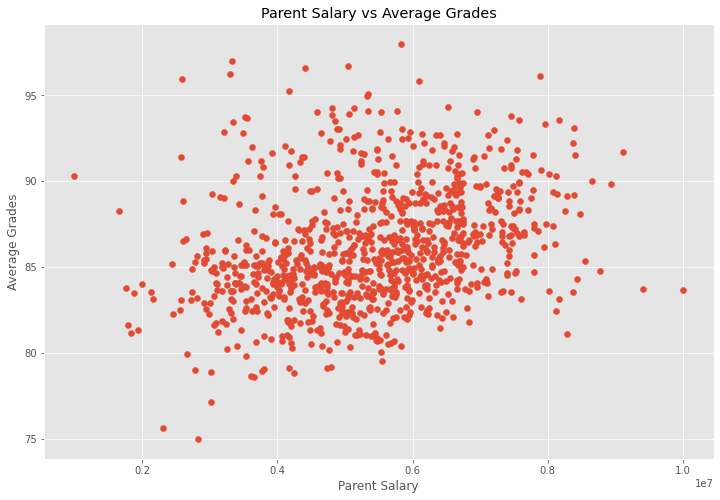

In [19]:
# Scatter plot with parent salary vs average grades

plt.scatter(x=df['parent_salary'], y=df['average_grades'])

plt.title('Parent Salary vs Average Grades')

plt.xlabel('Parent Salary')
plt.ylabel('Average Grades')

plt.show()

<AxesSubplot:xlabel='parent_salary', ylabel='average_grades'>

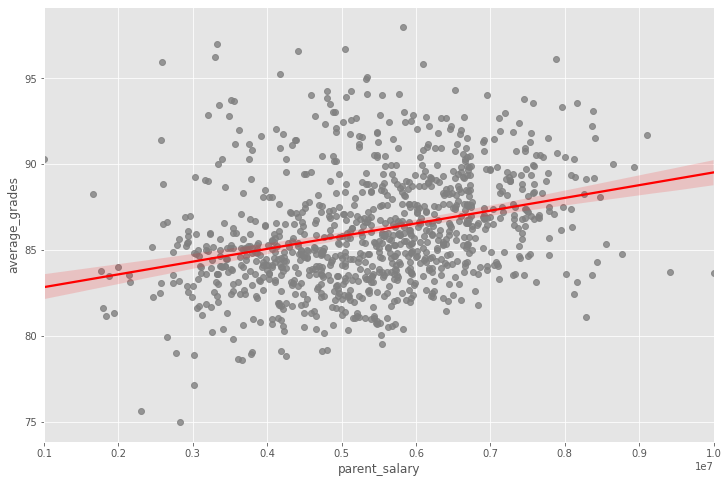

In [21]:
# Plot parent salary vs average grades using seaborn

sns.regplot(x='parent_salary', y='average_grades', data=df, scatter_kws={"color":"gray"},line_kws={"color":"red"})

In [ ]:
# Let's start looking at correlation

In [22]:
df.corr(method='pearson')

,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
parent_age,1.000000,-0.286418,0.107060,-0.006077,-0.438322,0.042873
parent_salary,-0.286418,1.000000,0.138357,0.306712,0.106487,0.475693
house_area,0.107060,0.138357,1.000000,0.409565,0.145186,0.467267
average_grades,-0.006077,0.306712,0.409565,1.000000,0.236713,0.505133
parent_was_in_college,-0.438322,0.106487,0.145186,0.236713,1.000000,0.048038
in_college,0.042873,0.475693,0.467267,0.505133,0.048038,1.000000


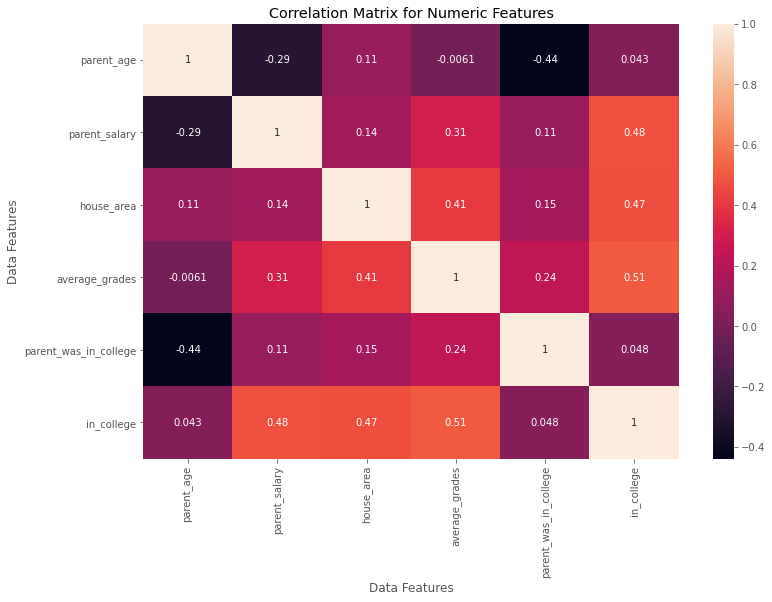

In [24]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Data Features')
plt.ylabel('Data Features')

plt.show()